In [21]:
#!pip install DataSynthesizer

In [22]:
import pandas as pd
import numpy as np
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
os.chdir('/users/pgrad/mamu/Documents/first/data-synthesizer')

In [23]:
original_data = '../datasets/data.csv'

mode = 'correlated_attribute_mode'
description_files = f'./results/description_{mode}.json'
synthetic_data = f'./results/synthetic_data_{mode}.csv'

In [24]:
threshold_value = 150

categorical_attributes = {'Species':True}

candidate_keys = {'Species': True}

epsilon = 1

degree_of_bayesian_network = 3

num_tuples_to_generate = 348

In [25]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=original_data, epsilon=epsilon, k=degree_of_bayesian_network, attribute_to_is_categorical=categorical_attributes, attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_files)

================ Constructing Bayesian Network (BN) ================
Adding ROOT Gender
Adding attribute Difficulty Breathing
Adding attribute Blood Pressure
Adding attribute Fatigue
Adding attribute Cough
Adding attribute Fever
Adding attribute Cholesterol Level
Adding attribute Disease
Adding attribute Outcome Variable
Adding attribute Age
========================== BN constructed ==========================


In [26]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    Difficulty Breathing has parents ['Gender'].
    Blood Pressure       has parents ['Difficulty Breathing', 'Gender'].
    Fatigue              has parents ['Difficulty Breathing', 'Blood Pressure', 'Gender'].
    Cough                has parents ['Blood Pressure', 'Fatigue', 'Difficulty Breathing'].
    Fever                has parents ['Fatigue', 'Cough', 'Gender'].
    Cholesterol Level    has parents ['Difficulty Breathing', 'Cough', 'Gender'].
    Disease              has parents ['Fever', 'Cholesterol Level', 'Blood Pressure'].
    Outcome Variable     has parents ['Fatigue', 'Disease', 'Blood Pressure'].
    Age                  has parents ['Disease', 'Outcome Variable', 'Fever'].


In [27]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(n=num_tuples_to_generate, description_file=description_files)
generator.save_synthetic_data(synthetic_data)

In [28]:
input_df = pd.read_csv(original_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)

attribute_description = read_json_file(description_files)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

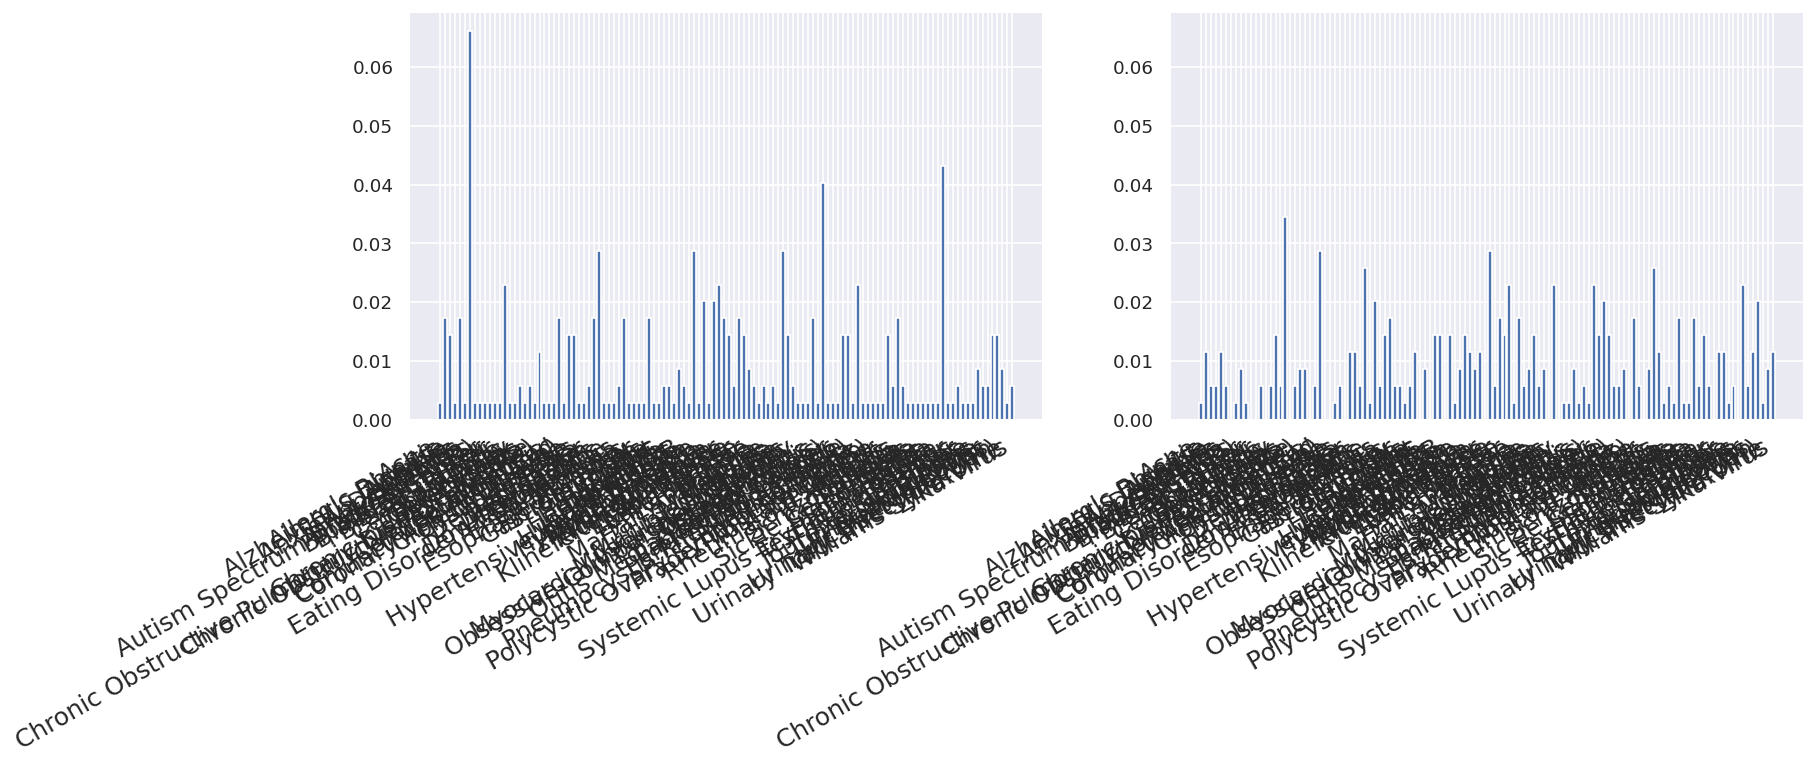

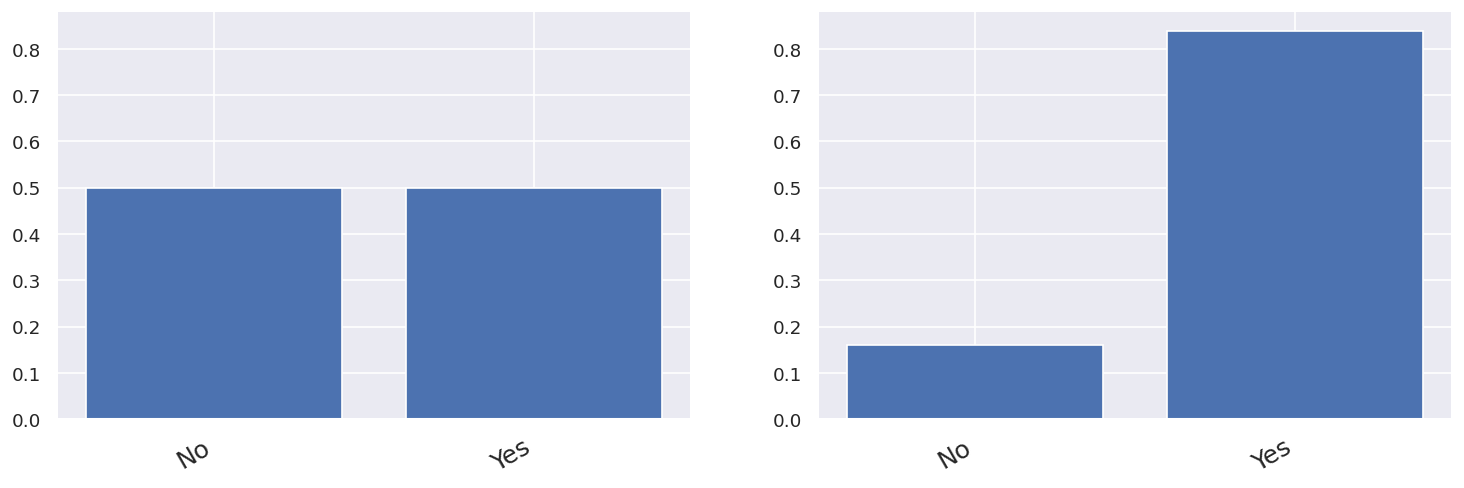

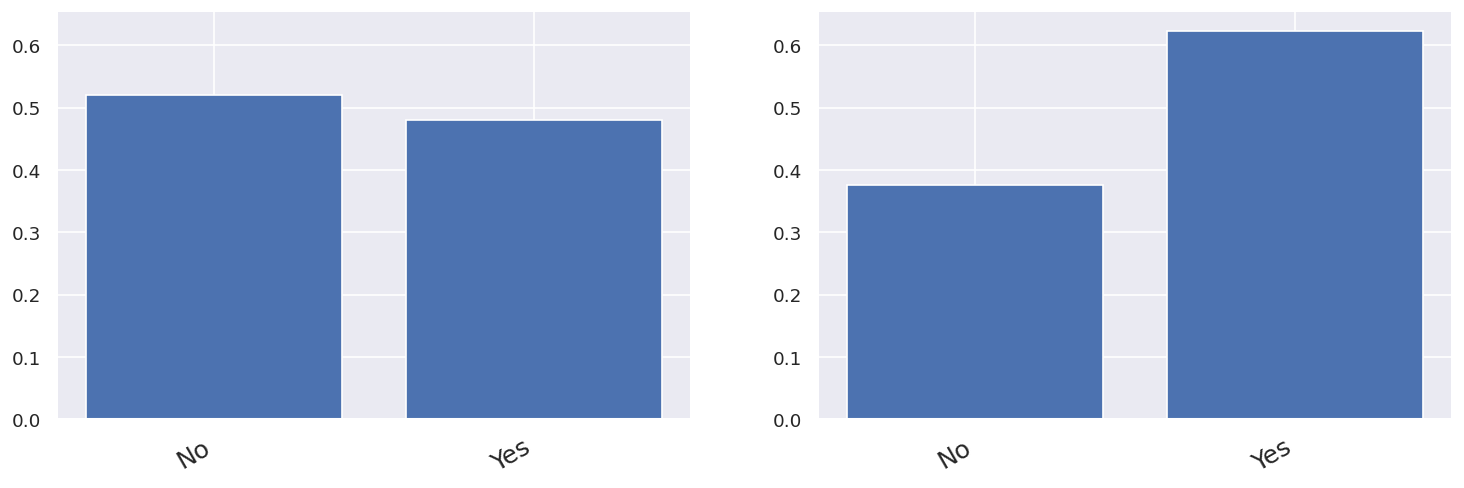

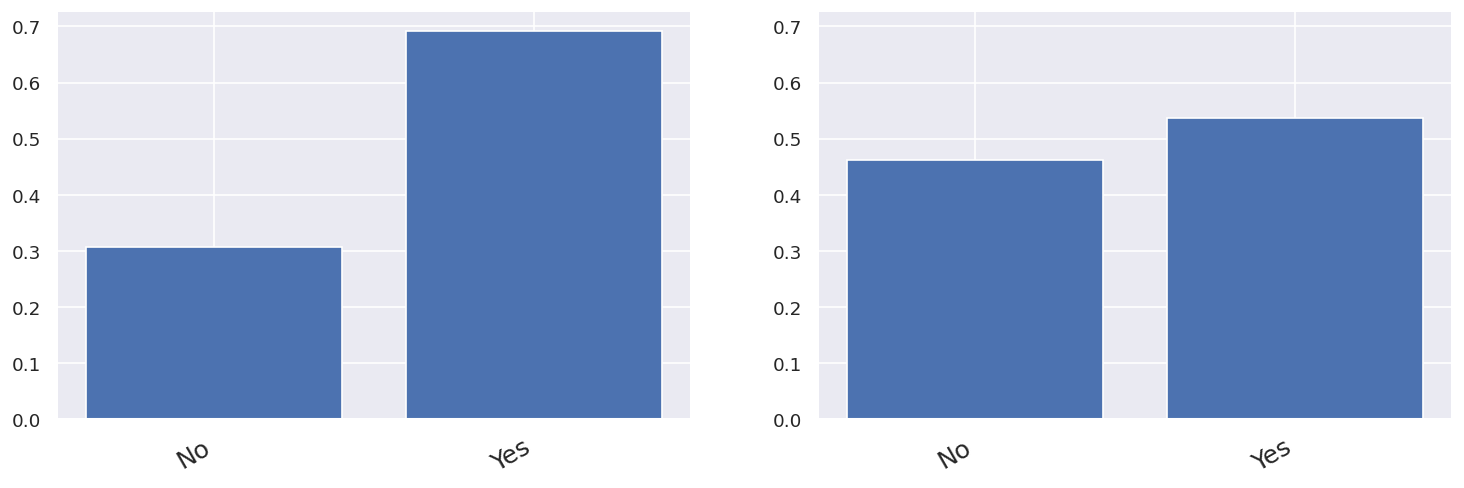

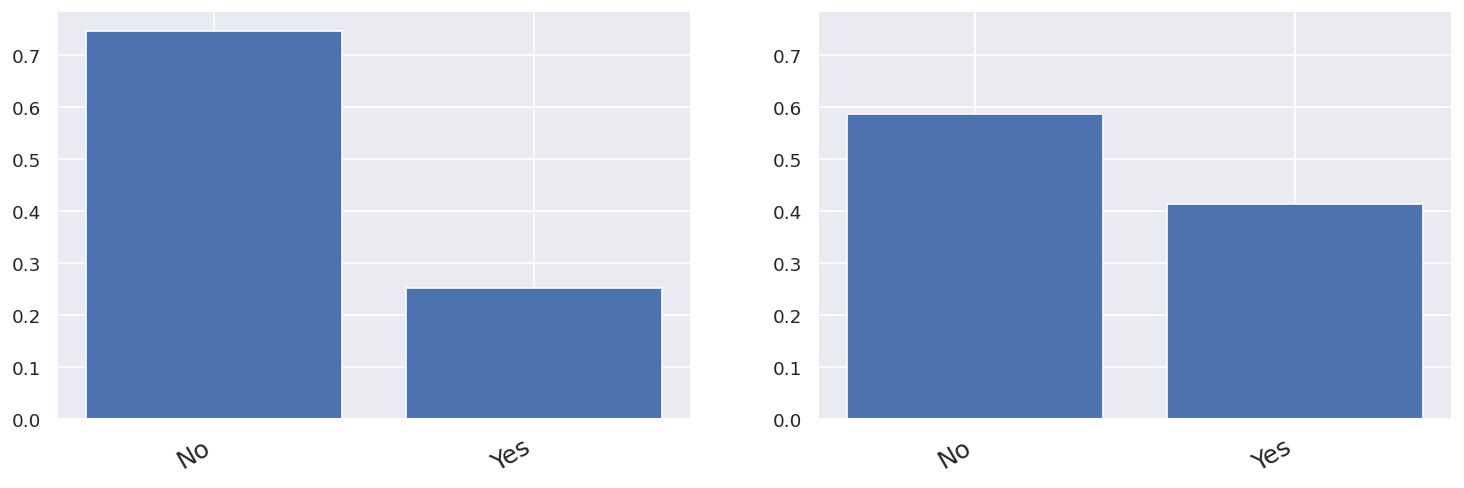

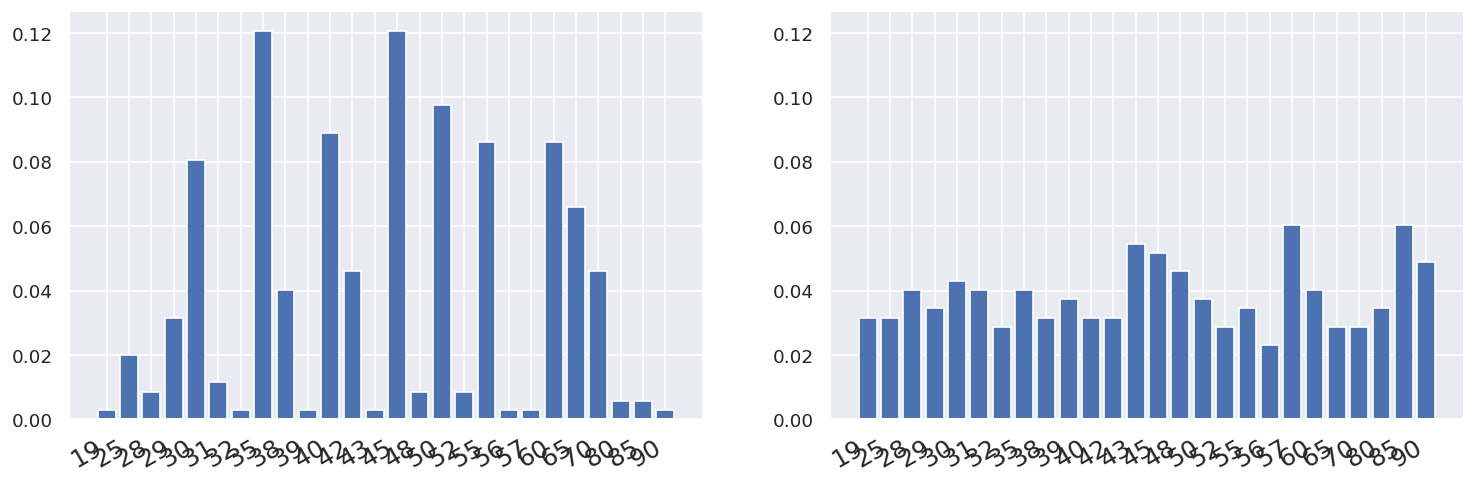

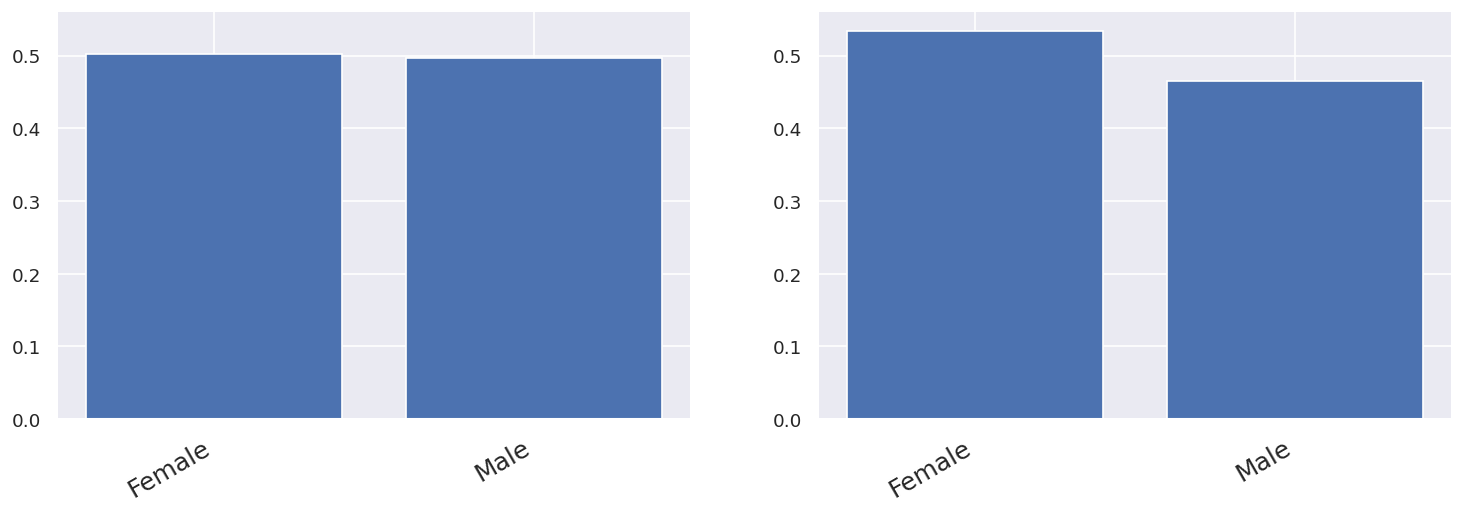

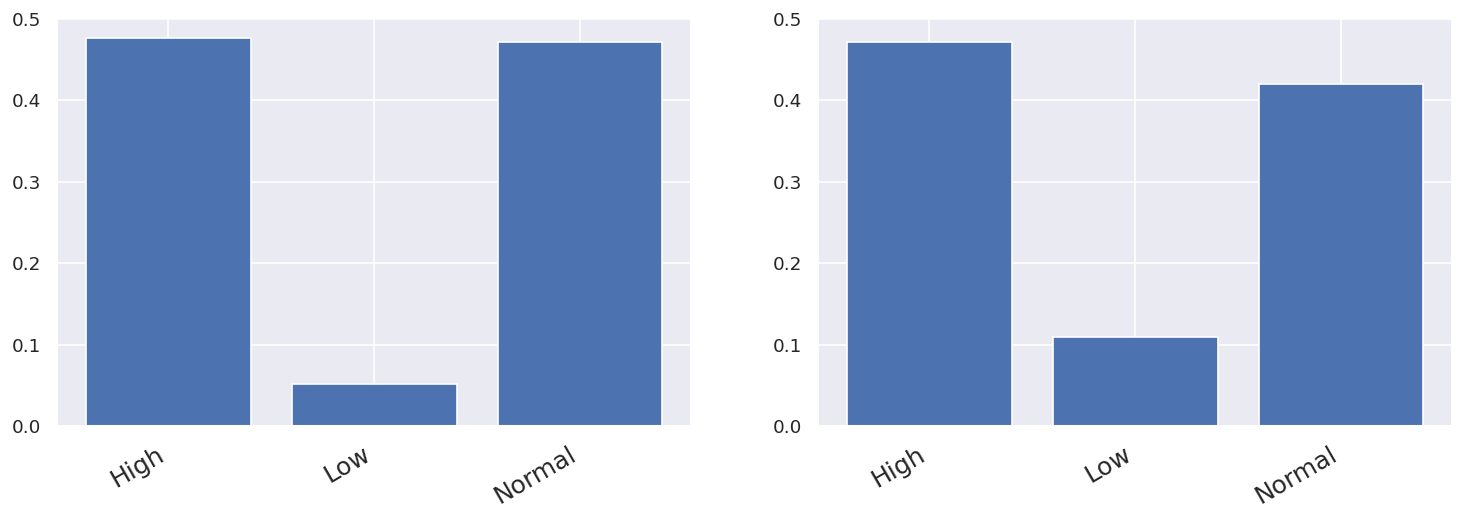

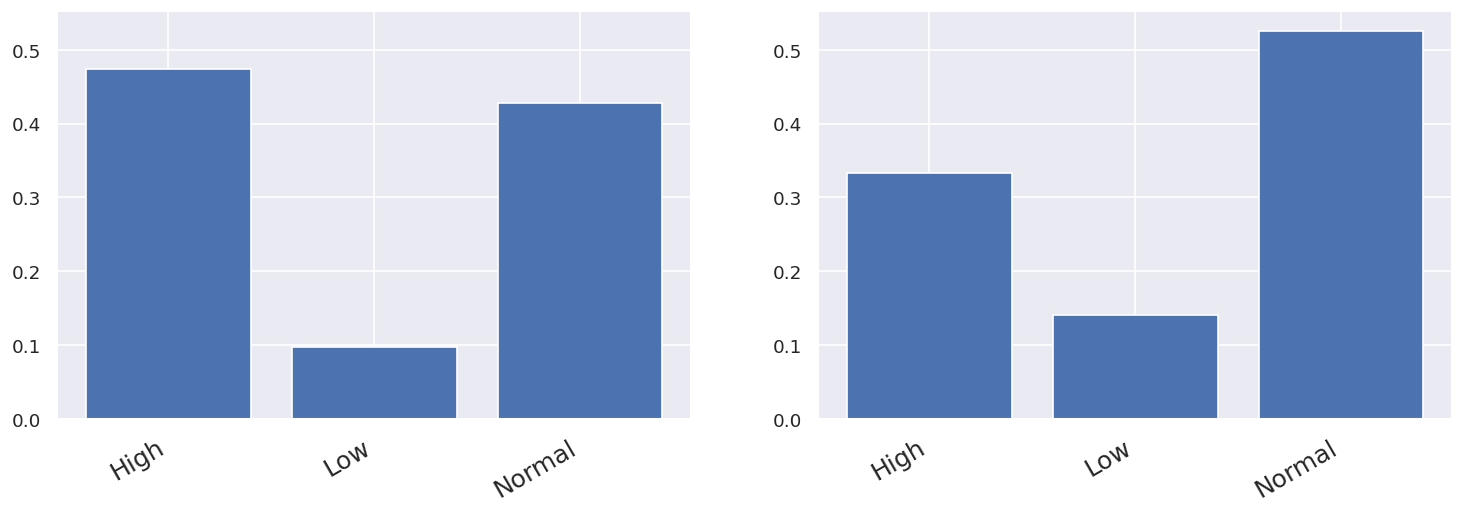

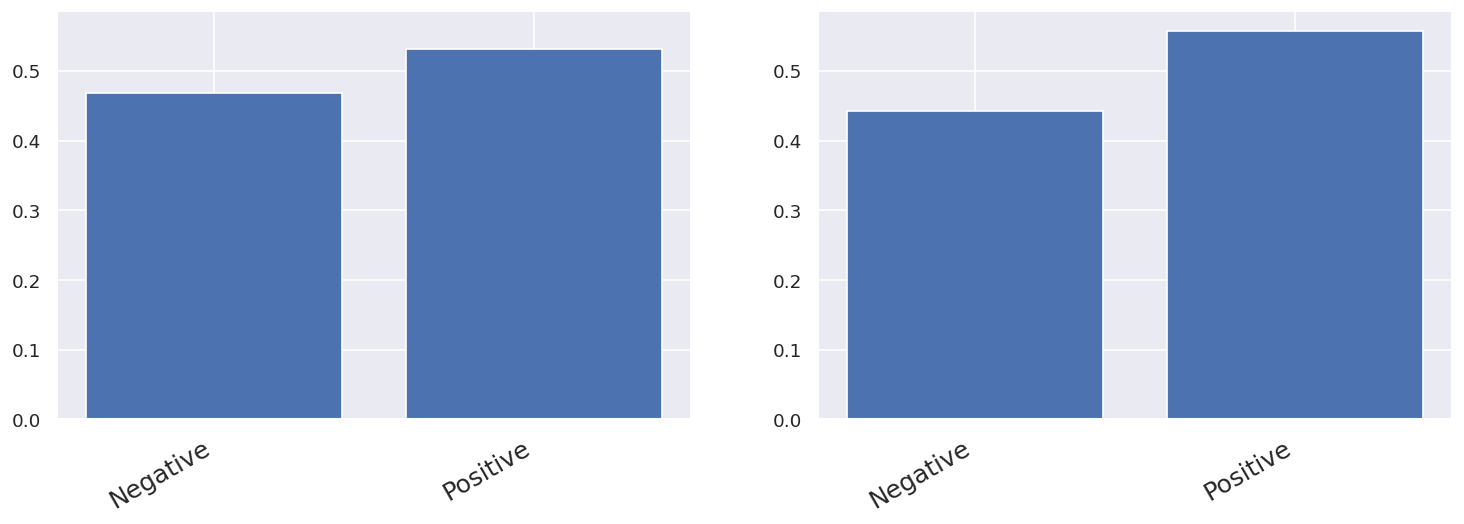

In [29]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

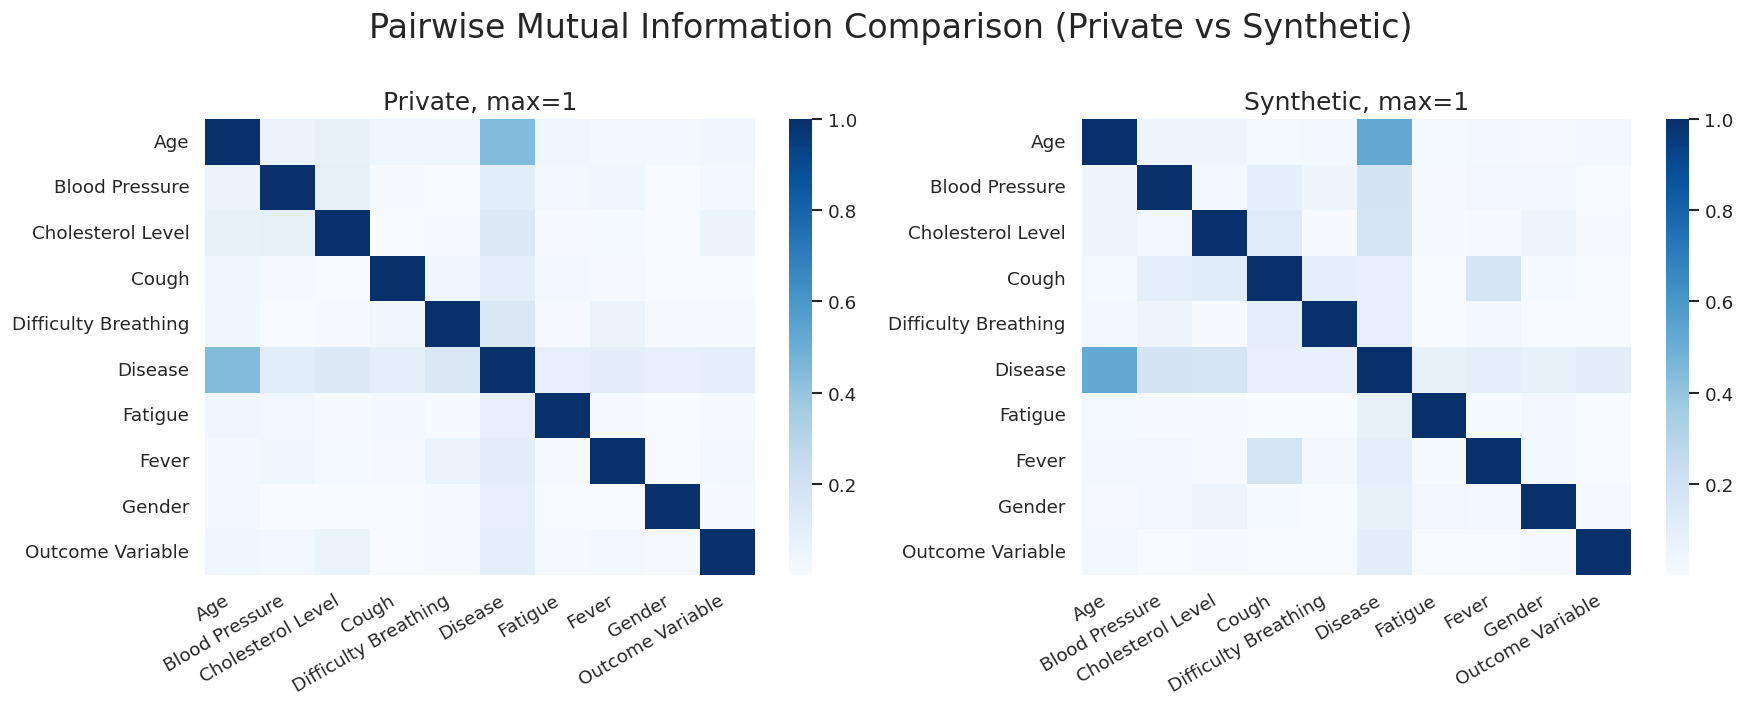

In [30]:
inspector.mutual_information_heatmap()